In [23]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [25]:
NUM_CLASSES = 5

# 学習データ読み込み

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 5)                 55        
                                                                 
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [31]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/32 [..............................] - ETA: 8s - loss: 1.7209 - accuracy: 0.0625
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 5ms/step - loss: 1.6279 - accuracy: 0.1947 - val_loss: 1.5166 - val_accuracy: 0.4222
Epoch 2/1000
 1/32 [..............................] - ETA: 0s - loss: 1.5975 - accuracy: 0.2188
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 1.5269 - accuracy: 0.3342 - val_loss: 1.4263 - val_accuracy: 0.4790
Epoch 3/1000
 1/32 [..............................] - ETA: 0s - loss: 1.4596 - accuracy: 0.4219
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 1.4335 - accuracy: 0.3923 - val_loss: 1.3208 - val_accuracy: 0.4910
Epoch 4/1000
 1/32 [..............................] - ETA: 0s - loss: 1.3818 - accuracy: 0.3672
E

 1/32 [..............................] - ETA: 0s - loss: 0.8457 - accuracy: 0.6406
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.8891 - accuracy: 0.6449 - val_loss: 0.5999 - val_accuracy: 0.8368
Epoch 29/1000
 1/32 [..............................] - ETA: 0s - loss: 0.8578 - accuracy: 0.6484
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.8765 - accuracy: 0.6601 - val_loss: 0.5936 - val_accuracy: 0.8391
Epoch 30/1000
 1/32 [..............................] - ETA: 0s - loss: 0.8191 - accuracy: 0.6953
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.8633 - accuracy: 0.6743 - val_loss: 0.5818 - val_accuracy: 0.8458
Epoch 31/1000
 1/32 [..............................] - ETA: 0s - loss: 1.0440 - accuracy: 0.6016
Epoch 31

 1/32 [..............................] - ETA: 0s - loss: 0.7652 - accuracy: 0.6797
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.7828 - accuracy: 0.7008 - val_loss: 0.4500 - val_accuracy: 0.8735
Epoch 56/1000
 1/32 [..............................] - ETA: 0s - loss: 0.7633 - accuracy: 0.7031
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.7600 - accuracy: 0.7090 - val_loss: 0.4474 - val_accuracy: 0.8735
Epoch 57/1000
 1/32 [..............................] - ETA: 0s - loss: 0.7155 - accuracy: 0.7500
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.7766 - accuracy: 0.7015 - val_loss: 0.4440 - val_accuracy: 0.8810
Epoch 58/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6985 - accuracy: 0.7578
Epoch 58

 1/32 [..............................] - ETA: 0s - loss: 0.6686 - accuracy: 0.7109
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.7188 - accuracy: 0.7312 - val_loss: 0.3918 - val_accuracy: 0.9154
Epoch 83/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6508 - accuracy: 0.7266
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.7240 - val_loss: 0.3905 - val_accuracy: 0.9132
Epoch 84/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6307 - accuracy: 0.7969
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.7205 - accuracy: 0.7260 - val_loss: 0.3863 - val_accuracy: 0.9169
Epoch 85/1000
 1/32 [..............................] - ETA: 0s - loss: 0.7522 - accuracy: 0.7109
Epoch 85

 1/32 [..............................] - ETA: 0s - loss: 0.7240 - accuracy: 0.6953
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6693 - accuracy: 0.7479 - val_loss: 0.3575 - val_accuracy: 0.9274
Epoch 110/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6558 - accuracy: 0.7500
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.7022 - accuracy: 0.7335 - val_loss: 0.3731 - val_accuracy: 0.9162
Epoch 111/1000
 1/32 [..............................] - ETA: 0s - loss: 0.7482 - accuracy: 0.6953
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6787 - accuracy: 0.7477 - val_loss: 0.3567 - val_accuracy: 0.9289
Epoch 112/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6658 - accuracy: 0.6953
Ep

Epoch 136/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6947 - accuracy: 0.7500
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6588 - accuracy: 0.7494 - val_loss: 0.3478 - val_accuracy: 0.9356
Epoch 137/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6697 - accuracy: 0.7344
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6649 - accuracy: 0.7537 - val_loss: 0.3415 - val_accuracy: 0.9296
Epoch 138/1000
 1/32 [..............................] - ETA: 0s - loss: 0.7728 - accuracy: 0.7031
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6671 - accuracy: 0.7542 - val_loss: 0.3449 - val_accuracy: 0.9416
Epoch 139/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6909 - accu

Epoch 163/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6417 - accuracy: 0.7500
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6458 - accuracy: 0.7632 - val_loss: 0.3304 - val_accuracy: 0.9439
Epoch 164/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6421 - accuracy: 0.7344
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6407 - accuracy: 0.7647 - val_loss: 0.3325 - val_accuracy: 0.9409
Epoch 165/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5193 - accuracy: 0.7969
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6431 - accuracy: 0.7577 - val_loss: 0.3310 - val_accuracy: 0.9409
Epoch 166/1000
 1/32 [..............................] - ETA: 0s - loss: 0.8419 - accu

Epoch 190/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6544 - accuracy: 0.7500
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6339 - accuracy: 0.7697 - val_loss: 0.3203 - val_accuracy: 0.9513
Epoch 191/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5712 - accuracy: 0.7891
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6345 - accuracy: 0.7712 - val_loss: 0.3230 - val_accuracy: 0.9416
Epoch 192/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5439 - accuracy: 0.8047
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6312 - accuracy: 0.7697 - val_loss: 0.3183 - val_accuracy: 0.9528
Epoch 193/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5558 - accu

Epoch 217/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5989 - accuracy: 0.7422
Epoch 217: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6179 - accuracy: 0.7709 - val_loss: 0.3188 - val_accuracy: 0.9446
Epoch 218/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6811 - accuracy: 0.7422
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.7609 - val_loss: 0.3167 - val_accuracy: 0.9476
Epoch 219/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5876 - accuracy: 0.7656
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.7619 - val_loss: 0.3094 - val_accuracy: 0.9513
Epoch 220/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6314 - accu

Epoch 244/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5364 - accuracy: 0.7422
Epoch 244: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6253 - accuracy: 0.7647 - val_loss: 0.3104 - val_accuracy: 0.9491
Epoch 245/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6098 - accuracy: 0.7812
Epoch 245: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6065 - accuracy: 0.7786 - val_loss: 0.3037 - val_accuracy: 0.9528
Epoch 246/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5763 - accuracy: 0.7812
Epoch 246: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.7769 - val_loss: 0.3012 - val_accuracy: 0.9558
Epoch 247/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6518 - accu

Epoch 271/1000
 1/32 [..............................] - ETA: 0s - loss: 0.7509 - accuracy: 0.7578
Epoch 271: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.5995 - accuracy: 0.7846 - val_loss: 0.2923 - val_accuracy: 0.9603
Epoch 272/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6576 - accuracy: 0.7656
Epoch 272: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.5987 - accuracy: 0.7821 - val_loss: 0.2955 - val_accuracy: 0.9551
Epoch 273/1000
 1/32 [..............................] - ETA: 0s - loss: 0.7607 - accuracy: 0.7266
Epoch 273: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.7789 - val_loss: 0.2981 - val_accuracy: 0.9566
Epoch 274/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5540 - accu

In [34]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 810us/step - loss: 0.2895 - accuracy: 0.9528


In [35]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [36]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 36ms/step
[3.3842985e-04 9.9702233e-01 2.4404356e-03 7.4658565e-05 1.2426046e-04]
1


# 混同行列

42/42 [==============================] - 0s 591us/step


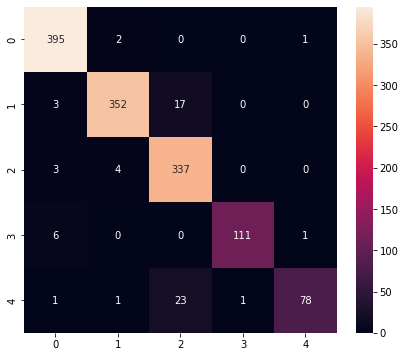

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       398
           1       0.98      0.95      0.96       372
           2       0.89      0.98      0.93       344
           3       0.99      0.94      0.97       118
           4       0.97      0.75      0.85       104

    accuracy                           0.95      1336
   macro avg       0.96      0.92      0.94      1336
weighted avg       0.96      0.95      0.95      1336



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [38]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [39]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/33/700r8l5n1pv96shhjsh1tzb00000gr/T/tmpjldtx54u/assets


INFO:tensorflow:Assets written to: /var/folders/33/700r8l5n1pv96shhjsh1tzb00000gr/T/tmpjldtx54u/assets
2022-07-01 21:48:54.269073: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-07-01 21:48:54.269085: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-07-01 21:48:54.269179: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/33/700r8l5n1pv96shhjsh1tzb00000gr/T/tmpjldtx54u
2022-07-01 21:48:54.270530: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-07-01 21:48:54.270541: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /var/folders/33/700r8l5n1pv96shhjsh1tzb00000gr/T/tmpjldtx54u
2022-07-01 21:48:54.274989: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-07-01 21:48:54.310036: I tensorflow/cc/saved_model/loader.cc:212] Running initialization

6560

# 推論テスト

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [41]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 193 µs, sys: 52 µs, total: 245 µs
Wall time: 255 µs


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.3842999e-04 9.9702233e-01 2.4404391e-03 7.4658703e-05 1.2426081e-04]
1
